# Projection Matrices

```javascript
var i;
for (i = 0; i < 10; i++){
    console.log('counting:', i);
}
```

**Projec Onto a Line**

$e=b-p$

$e=b-\hat{x}a$



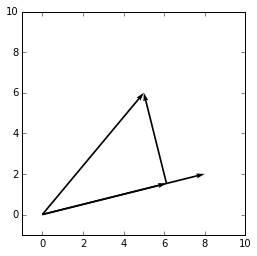

In [81]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def join(*args): return np.concatenate(args)

z = np.array([0., 0.])
b = np.array([5., 6.])
a = np.array([8., 2.])
p = a * (a.dot(b)/a.dot(a))
e = b - p

data = np.array([ join(z, a), join(z, b), join(p, e), join(z,p) ])

X,Y,U,V = zip(*data)
# X is an array that contains the x positions of all the vectors
# Y contains the y position
# U, V are arrays containing horizontal and vertical values of all vectors

plt.figure() # initialize the figure
ax = plt.gca() # get current axes

# Quiver Docs
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.quiver
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
ax.set_aspect(1.)


# plt.axis('equal')
plt.draw()